In [1]:
import os
import sys
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

from psikit import Psikit

import pandas as pd
from rdkit.Chem import PandasTools

In [3]:
file_name = 'smiles.csv'

data = pd.read_csv(file_name)
data

# with open(file_name, "r") as ins:
#     smiles = []
#     for line in ins:
#         smiles.append(line.split('\n')[0])
# print('# of SMILES:', len(smiles))

,smiles
0,C=C
1,C=O
2,C#N
3,CCC(=O)O
4,CN=C=O
5,C1=CCC=CC1
6,C1=CC=CC=C1
7,C1=C(C)C=CC=C1
8,C1CCC2CCCCC2C1


,smiles,ROMol
0,C=C,
1,C=O,
2,C#N,
3,CCC(=O)O,
4,CN=C=O,
5,C1=CCC=CC1,
6,C1=CC=CC=C1,
7,C1=C(C)C=CC=C1,
8,C1CCC2CCCCC2C1,

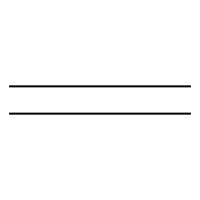
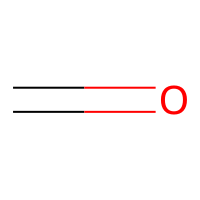
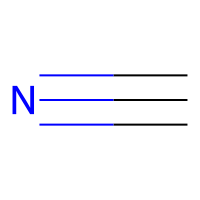
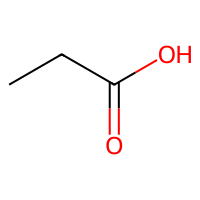
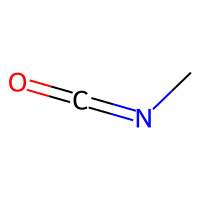
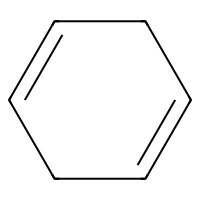
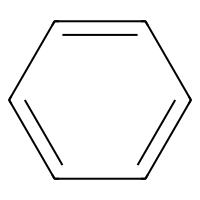
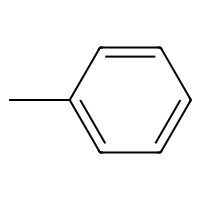
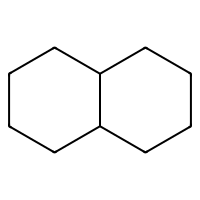

In [4]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol='smiles')
data

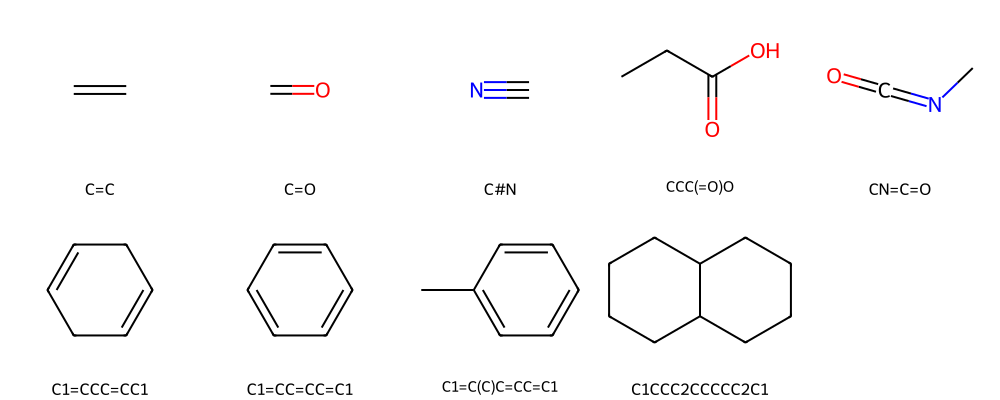

In [5]:
PandasTools.FrameToGridImage(data, legendsCol="smiles", molsPerRow=5)

,smiles,ROMol,n_Atoms
0,C=C,,2
1,C=O,,2
2,C#N,,2
3,CCC(=O)O,,5
4,CN=C=O,,4
5,C1=CCC=CC1,,6
6,C1=CC=CC=C1,,6
7,C1=C(C)C=CC=C1,,7
8,C1CCC2CCCCC2C1,,10

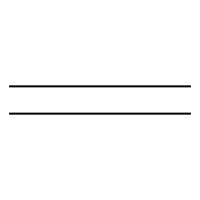
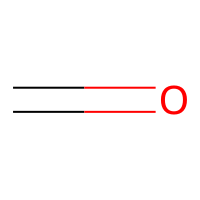
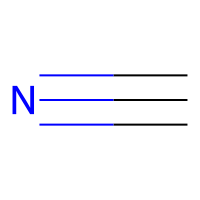
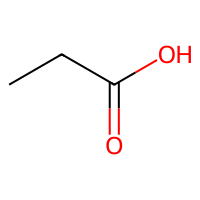
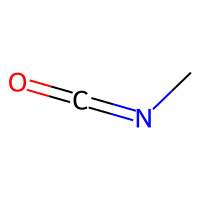
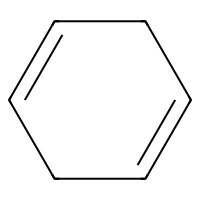
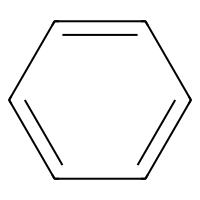
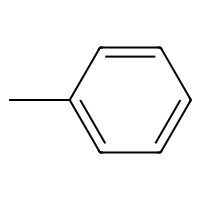
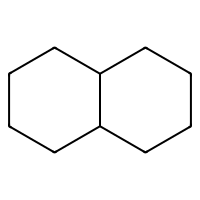

In [6]:
data["n_Atoms"] = data['ROMol'].map(lambda x: x.GetNumAtoms())
data

In [7]:
data['smiles'][0]

'C=C'

In [8]:
pk=Psikit(debug=True,threads=1,memory=12)

energies = []

for mol_smiles in data['smiles']:

    %time
    pk.read_from_smiles(mol_smiles)
    opt_ene = pk.optimize(maxiter=100)
    print(opt_ene)
    energies.append(opt_ene)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 µs
Optimizer: Optimization complete!
-78.03876941254534
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs
Optimizer: Optimization complete!
-113.86953646696564
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs
Optimizer: Optimization complete!
-92.87694247778018
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs
Optimizer: Optimization complete!
-266.85898515789006
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Optimizer: Optimization complete!
-206.79559264219304
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
Optimizer: Optimization complete!
-231.84676172485638
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Optimizer: Optimization complete!
-230.71352354212274
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Optimizer: Optimization complete!
-269.75355216717657
CPU times: user 2 µs, sys: 0 ns, total: 2 

,smiles,ROMol,n_Atoms,Optimized energy
0,C=C,,2,-78.038769
1,C=O,,2,-113.869536
2,C#N,,2,-92.876942
3,CCC(=O)O,,5,-266.858985
4,CN=C=O,,4,-206.795593
5,C1=CCC=CC1,,6,-231.846762
6,C1=CC=CC=C1,,6,-230.713524
7,C1=C(C)C=CC=C1,,7,-269.753552
8,C1CCC2CCCCC2C1,,10,-389.216125

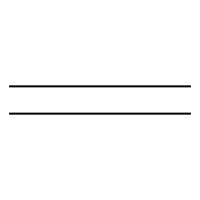
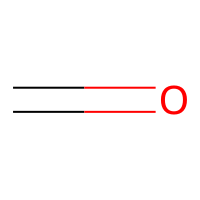
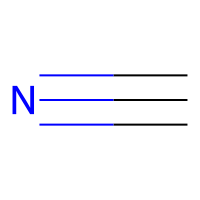
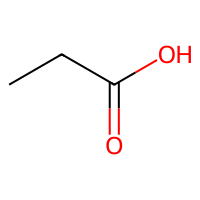
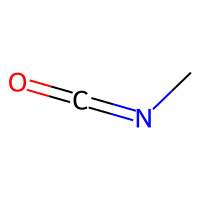
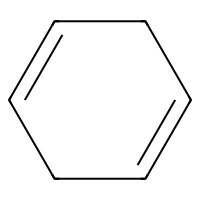
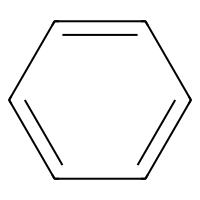
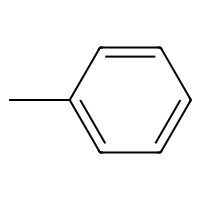
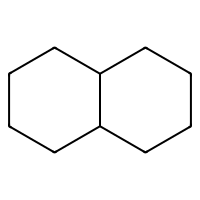

In [12]:
data["Optimized energy"] = energies
data